## Exercise - week 4

### Exercise 1 - numpy

1. Open the file './befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

In [1]:
import numpy as np

filename = './befkbhalderstatkode.csv'
bef_stats_df = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
print(bef_stats_df)

[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [1992   99   89 5100    1]
 [1992   99   90 5180    1]
 [1992   99   93 5100    1]]


using this data:
    
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

3. Find out how many people lived in each of the 11 areas in 2015

In [7]:
areas = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}
    
stats = bef_stats_df

def number_of_people(area, mask):
    all_people = stats[mask & (stats[:,1] == area)]
    sum_of_people = all_people[:,4].sum()
    return sum_of_people

def get_people(): 
    mask = (stats[:,0] == 2015) & (stats[:,3] == 5100)

    return np.array([number_of_people(area, mask) for area in areas.keys()])


list(get_people())
           

[44744, 65846, 66715, 51898, 44868, 35666, 34300, 42662, 47873, 55452, 2590]

4. Make a bar plot to show the size of each city area from the smallest to the largest

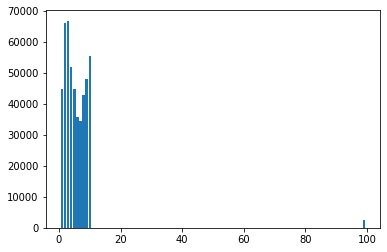

In [8]:
import matplotlib.pyplot as plt

set_of_areas = list(areas.keys())
freq_people = get_people()

plt.bar(set_of_areas, freq_people)
plt.show()

5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015

In [20]:
mask = (stats[:,0] == 2015) & (stats[:,2] > 65) & (stats[:,3] == 5100)
np.sum(stats[mask][:,4])

52299

6. How many of those were from the other nordic countries (not dk)

In [56]:
mask = (stats[:,0] == 2015) & (stats[:,2] > 65)
mask_sweden = (stats[:,3] == 5120)
mask_norway = (stats[:,3] == 5110)
mask_finland = (stats[:,3] == 5104)
np.sum(stats[mask & (mask_sweden | mask_norway | mask_finland)][:,4])

575

7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

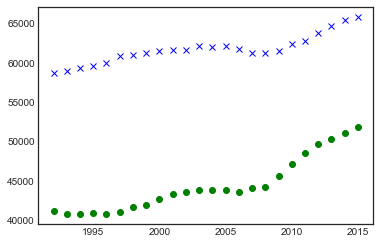

In [57]:
import matplotlib.pyplot as plt

def people_in_area(year, area):
    mask_denmark = (stats[:,3] == 5100)
    mask_area = (stats[:,1] == area)
    
    all_people = stats[mask_denmark & mask_area & (stats[:,0] == year)]
    sum_of_people = all_people[:,4].sum()
    return sum_of_people



years = np.unique(stats[:,0])
mask_years = years >= 1992

people_vesterbro = np.array([people_in_area(year,2) for year in years[mask_years]])
people_østerbro = np.array([people_in_area(year,4) for year in years[mask_years]])

plt.style.use('seaborn-white')
plt.plot(years[mask_years], people_vesterbro, 'bx')
plt.plot(years[mask_years], people_østerbro, 'go')
plt.show()
